In [138]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [175]:
def make_pie(visits, continent, file, angshift=None):
        
    fig1,ax1=plt.subplots()
    bbox_props=dict(boxstyle='square,pad=0.3',fc ='w',ec='k',lw=0.72)
    kw=dict(xycoords='data',textcoords='data',arrowprops=dict(arrowstyle='-'),zorder=0,va='center')

    total_visits = np.sum(visits)
    labels = [f"{continent[idx]}\n{row/total_visits*100:.1f}%" for idx, row in enumerate(visits)]
    values=visits
    
    # Add code
    annotate_dict = {k:v for k,v in zip(labels, values)}
    val = [[x,y] for x,y in zip(sorted(values, reverse=True),sorted(values))]
    values1 = sum(val, [])
    
    new_labels = []
    for v in values1[:len(values)]:
        for key, value in annotate_dict.items():
            if v == value:
                new_labels.append(key)
                
    wedges,texts=ax1.pie(values1[:len(values)],explode=np.full(shape=len(values),fill_value=0.01),labeldistance=0.8,startangle=90)
    for i,p in enumerate(wedges):
        ang=(p.theta2-p.theta1)/2. +p.theta1
        if not angshift:
            angshift = ang
        y=np.sin(np.deg2rad(ang))
        x=np.cos(np.deg2rad(ang))
        if "Oceania" in new_labels[i]:
            y=np.sin(np.deg2rad(angshift))
            x=np.cos(np.deg2rad(angshift))
        horizontalalignment={-1:"right",1:"left"}[int(np.sign(x))]
        connectionstyle="angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle":connectionstyle})
        ax1.annotate(new_labels[i],xy=(0, 0),xytext=(1.25*np.sign(x),1.4*y),
                    horizontalalignment=horizontalalignment,**kw)
        
    plt.show();
    fig1.savefig(file);

In [161]:
def a_release(astr):
    for num in astr:
        if num.isdigit():
            return True
    return False

# Gammapy.org stats

## General stats

In [139]:
file = "./Gammapy_PageView_15Sept2024-27Jan2026.csv"

In [140]:
visits = []
datadict = None
with open(file, newline='', encoding="utf-16") as csvfile:
    reader = csv.DictReader(csvfile)
    datadict = list(reader)
    for row in datadict:
        visits.append(int(row['Visits']))

In [141]:
print(f"Average visit per day : {np.average(visits):.1f} since {datadict[0]['Date']}")

Average visit per day : 22.3 since 2024-10-07


In [142]:
print(len(datadict))

477


10626 visits

Direct Entry: 61% 5989

Search Engines: 33.1% 3249

Websites: 5.7% 1063 (doc.gammapy.py, agnpy, numfocus, gammapy.github, pypi, astropy, christophdeil.com, acme.org )


## Per continent

In [67]:
file = "Gammapy_Continent_15Sept2024-27Jan2026.csv"
visits = []
continent = []
with open(file, newline='', encoding="utf-16") as csvfile:
    reader = csv.DictReader(csvfile)
    datadict = list(reader)
    for row in datadict:
        visits.append(int(row['Visits']))
        continent.append(row['Label'])

In [69]:
total_visits = np.sum(visits)
for idx, row in enumerate(visits):
    print(f"{row/total_visits*100:.1f}% from {continent[idx]}")

58.2% from Europe
17.5% from North America
16.8% from Asia
4.9% from South America
1.2% from Oceania
1.0% from Africa
0.3% from Central America


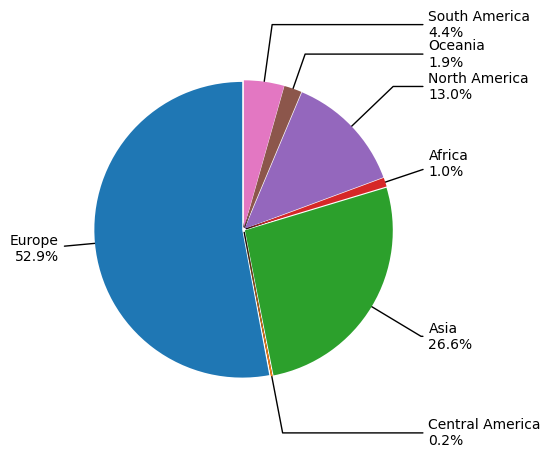

In [129]:
make_pie(visits, continent, "Gammapy_VisitPerContinent.png", 418)

index: 78% 8360

acknowledging.html	4.3% 460

# DocGammapy.org stats

## General Stats

In [143]:
file = "./GammapyDoc_PageView_15Sept2024-27Jan2026.csv"

In [155]:
totvisit=0
visits = []
datadict = None
with open(file, newline='', encoding="utf-16") as csvfile:
    reader = csv.DictReader(csvfile)
    datadict = list(reader)
    for row in datadict:
        str1, str2 = row['Date'].split(",")
        date1=datetime.datetime.strptime(str1, "%Y-%m-%d")
        date2=datetime.datetime.strptime(str2, "%Y-%m-%d")
        visits.append(int(row['Visits'])/(date2-date1).days)
        totvisit += int(row['Visits'])

In [157]:
print(f"Average visit per day : {np.average(visits):.1f} since {datadict[0]['Date']}")
print(f"Total visit : {totvisit}")

Average visit per day : 86.8 since 2024-10-07,2024-10-13
Total visit : 35953


Direct Entry: 68.5% 23,739
Search Engines: 27.7% 9,616
Websites: 2,9% 1,017
GitHub: 0.6% 208

In [172]:
file = "./GammapyDoc_Pages_15Sept2024-27Jan2026.csv"
releases = []
pages = []
with open(file, newline='', encoding="utf-16") as csvfile:
    reader = csv.DictReader(csvfile)
    datadict = list(reader)
    for row in datadict:
        label = row['Label']
        if a_release(label) or label == "dev":
            if not "rc" in label:
                releases.append(label)
                pages.append(int(row['Pageviews']))

In [173]:
print(np.sum(pages))
print(pages)
print(releases)

123083
[49003, 46500, 22758, 4822]
['dev', '1.3', '2.0', '2.0.1']


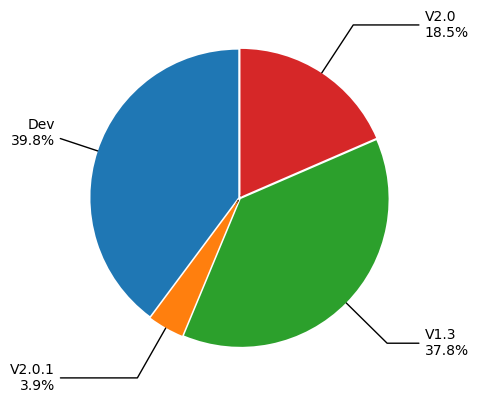

In [180]:
releases[0] = "Dev"
releases[1] = "V1.3"
releases[2] = "V2.0"
releases[3] = "V2.0.1"
make_pie(pages, releases, "GammapyDoc_VisitPerRelease.png")

## for the V1.3

In [187]:
pages = ["Tutorials", "API", "User-guide", "Get-started", "Development", "Release-notes", "Index"]
visits = [10300, 11424, 6463, 2263, 560, 468, 5765]

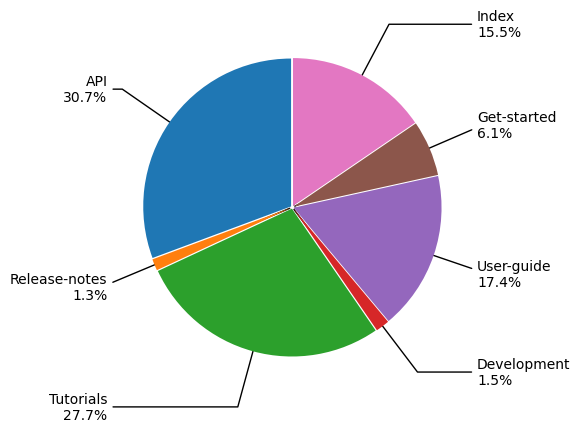

In [188]:
make_pie(visits, pages, "GammapyDoc_V1.3_pages.png")

In [ ]:
## for the V2.0

In [189]:
pages = ["Tutorials", "API", "User-guide", "Get-started", "Development", "Release-notes", "Index"]
visits = [5389, 5918, 2948, 1239, 300, 364, 2296]

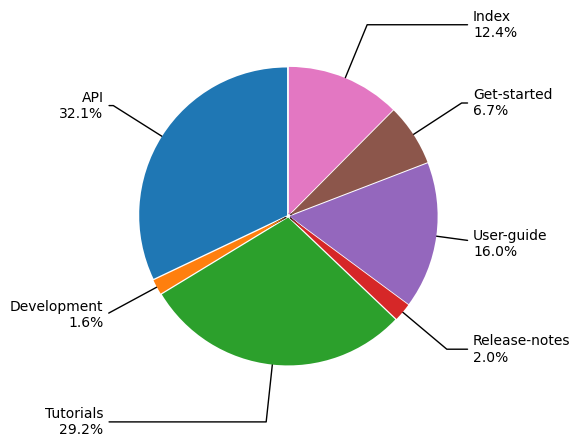

In [190]:
make_pie(visits, pages, "GammapyDoc_V2.0_pages.png")

## Per Continent

In [116]:
file = "GammapyDoc_Continent_15Sept2024-27Jan2026.csv"
visits = []
continent = []
with open(file, newline='', encoding="utf-16") as csvfile:
    reader = csv.DictReader(csvfile)
    datadict = list(reader)
    for row in datadict:
        visits.append(int(row['Visits']))
        continent.append(row['Label'])

In [117]:
total_visits = np.sum(visits)
for idx, row in enumerate(visits):
    print(f"{row/total_visits*100:.1f}% from {continent[idx]}")

52.9% from Europe
26.6% from Asia
13.0% from North America
4.4% from South America
1.9% from Oceania
1.0% from Africa
0.2% from Central America


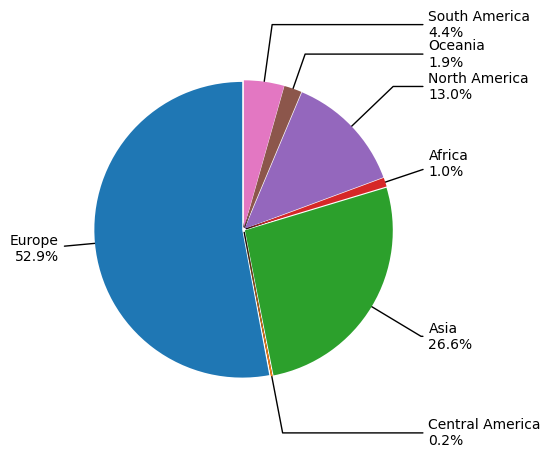

In [130]:
make_pie(visits, continent, "GammapyDoc_VisitPerContinent.png", angshift=418)